# LGM #DECEMBER 2022

Intermediate level 

Task-4: Exploratory Data Analysis on dataset ‘Global Terrorism’

WAKCHAURE SURAJ DATTATRAY

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

In [9]:
df=pd.read_csv('globalterrorismdb_0718dist.csv',encoding = 'ISO-8859-1',low_memory=False)

In [10]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [31]:
df.tail()

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
181686,2017,12,31,Somalia,Sub-Saharan Africa,Ceelka Geelow,2.359673,45.385034,Armed Assault,1.0,2.0,Checkpoint,12/31/2017: Assailants opened fire on a Somali...,Al-Shabaab,Military,Firearms,NaN,3.0
181687,2017,12,31,Syria,Middle East & North Africa,Jableh,35.407278,35.942679,Bombing/Explosion,2.0,7.0,Hmeymim Air Base,12/31/2017: Assailants launched mortars at the...,Muslim extremists,Military,Explosives,NaN,9.0
181688,2017,12,31,Philippines,Southeast Asia,Kubentog,6.900742,124.437908,Facility/Infrastructure Attack,0.0,0.0,Houses,12/31/2017: Assailants set fire to houses in K...,Bangsamoro Islamic Freedom Movement (BIFM),Private Citizens & Property,Incendiary,NaN,0.0
181689,2017,12,31,India,South Asia,Imphal,24.798346,93.940430,Bombing/Explosion,0.0,0.0,Office,12/31/2017: Assailants threw a grenade at a Fo...,Unknown,Government (General),Explosives,NaN,0.0
181690,2017,12,31,Philippines,Southeast Asia,Cotabato City,7.209594,124.241966,Bombing/Explosion,0.0,0.0,Unknown,12/31/2017: An explosive device was discovered...,Unknown,Unknown,Explosives,NaN,0.0


In [11]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


(181691, 135)

In [12]:
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [13]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target',
                       'nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group',
                       'targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
df=df[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType',
               'Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

df['casualities']=df['Killed']+df['Wounded']
df.head(5)

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,NaN


# Basic Analysis

In [14]:
print('Country with Highest Terrorist Attacks:',df['Country'].value_counts().index[0])
print('Regions with Highest Terrorist Attacks:',df['Region'].value_counts().index[0])
print('Regions with Highest Terrorist Attacks:',df['Weapon_type'].value_counts().index[0])
print('Maximum people killed in an attack are:',df['Killed'].max(),'that took place in',df.loc[df['Killed'].idxmax()].Country)

Country with Highest Terrorist Attacks: Iraq
Regions with Highest Terrorist Attacks: Middle East & North Africa
Regions with Highest Terrorist Attacks: Explosives
Maximum people killed in an attack are: 1570.0 that took place in Iraq


# Number Of Terrorist Activities vs Year

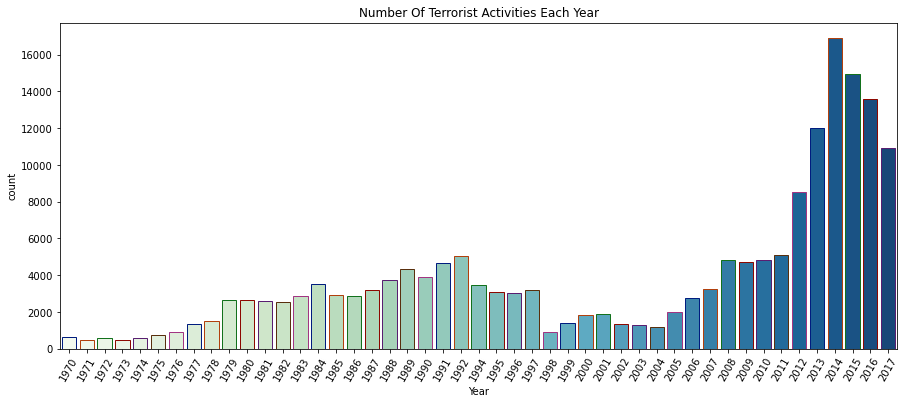

In [16]:
import seaborn as sns
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=df,palette='GnBu',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=60)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

# What are the attacking methods used?

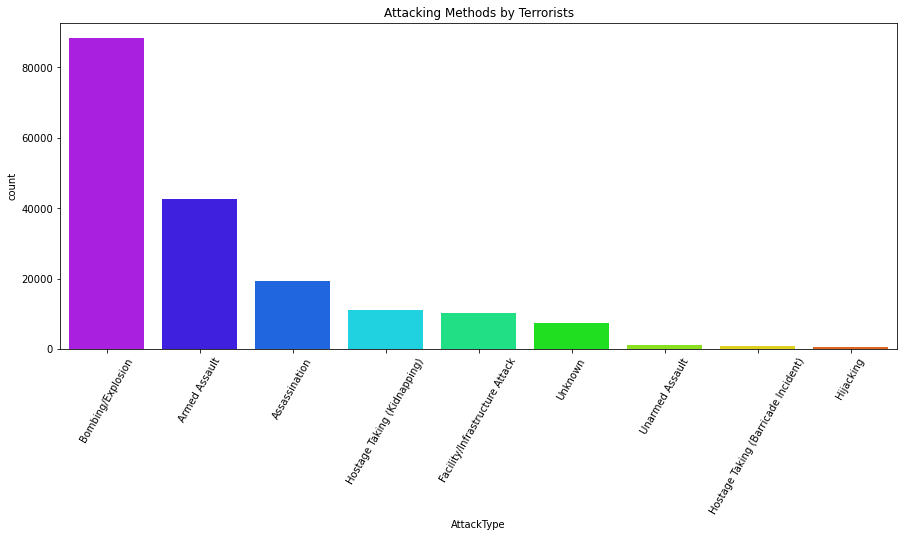

In [17]:
plt.subplots(figsize=(15,6))
sns.countplot('AttackType',data=df,palette='gist_rainbow_r',order=df['AttackType'].value_counts().index)
plt.xticks(rotation=60)
plt.title('Attacking Methods by Terrorists')
plt.show()

# Targets

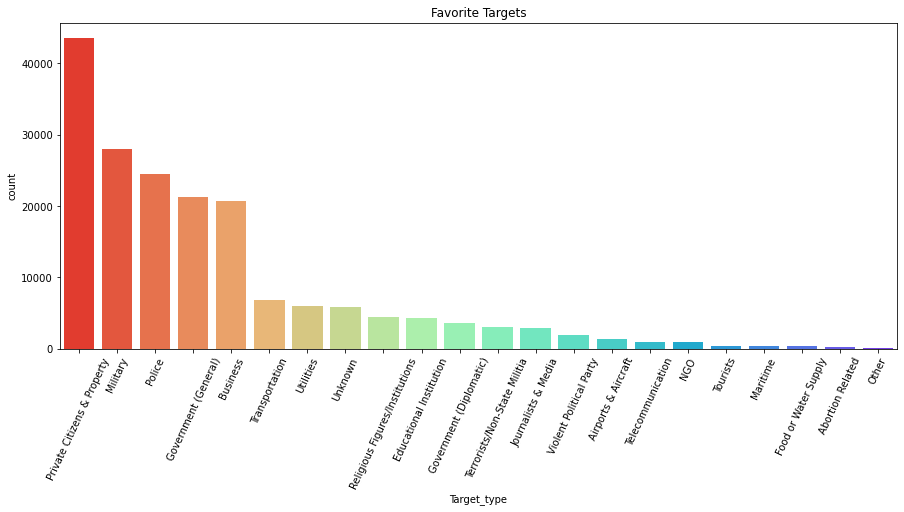

In [18]:
plt.subplots(figsize=(15,6))
sns.countplot(df['Target_type'],palette='rainbow_r',order=df['Target_type'].value_counts().index)
plt.xticks(rotation=65)
plt.title('Favorite Targets')
plt.show()

# Hot zones of terrorism

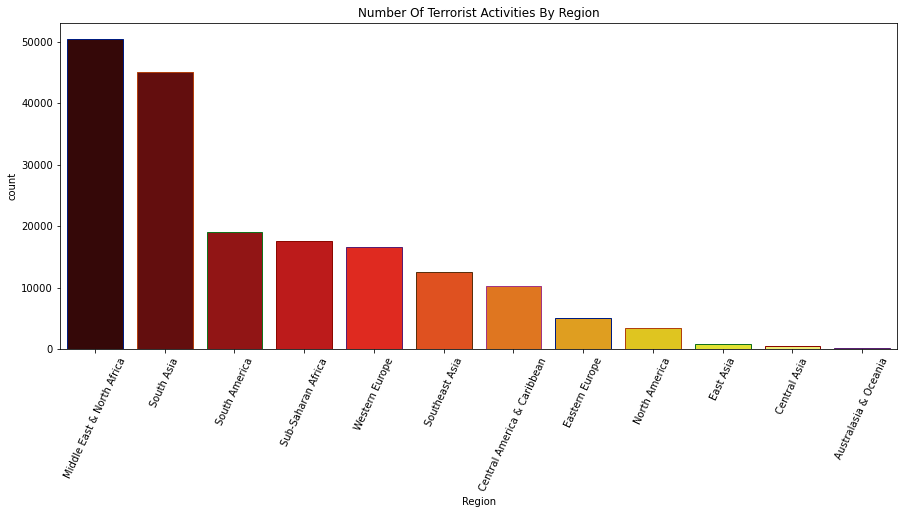

In [19]:
plt.subplots(figsize=(15,6))
sns.countplot('Region',data=df,palette='hot',edgecolor=sns.color_palette('dark',7),order=df['Region'].value_counts().index)
plt.xticks(rotation=65)
plt.title('Number Of Terrorist Activities By Region')
plt.show()

# Attacks vs Killed

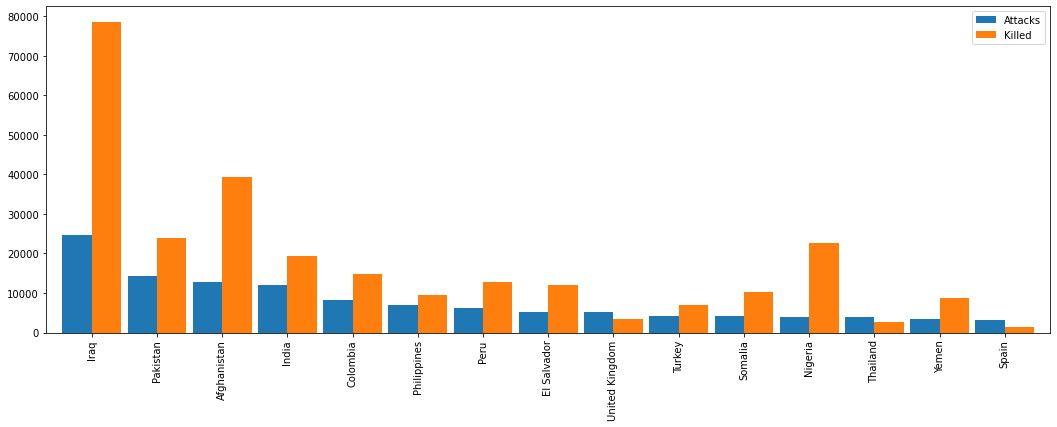

In [20]:
coun_terror=df['Country'].value_counts()[:15].to_frame()
coun_terror.columns=['Attacks']
coun_kill=df.groupby('Country')['Killed'].sum().to_frame()
coun_terror.merge(coun_kill,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

# Most Notorious Groups

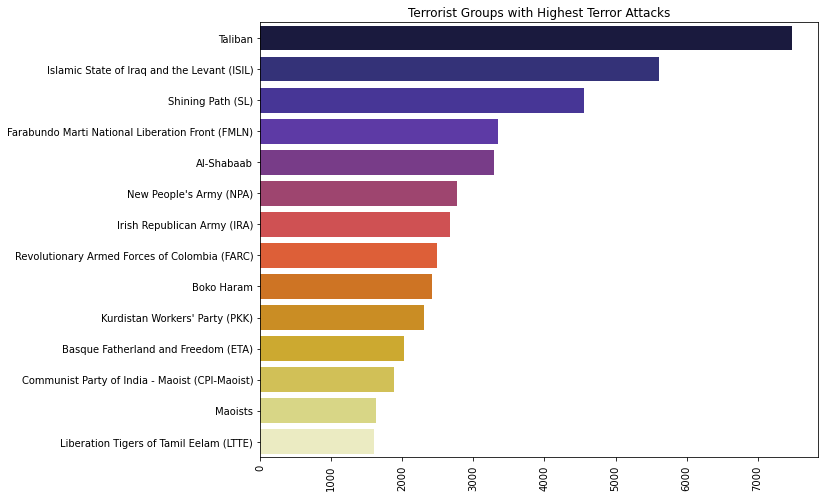

In [21]:
sns.barplot(df['Group'].value_counts()[1:15].values,df['Group'].value_counts()[1:15].index,palette=('CMRmap'))
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Terrorist Groups with Highest Terror Attacks')
plt.show()

# Activity of Top Terrorist Groups

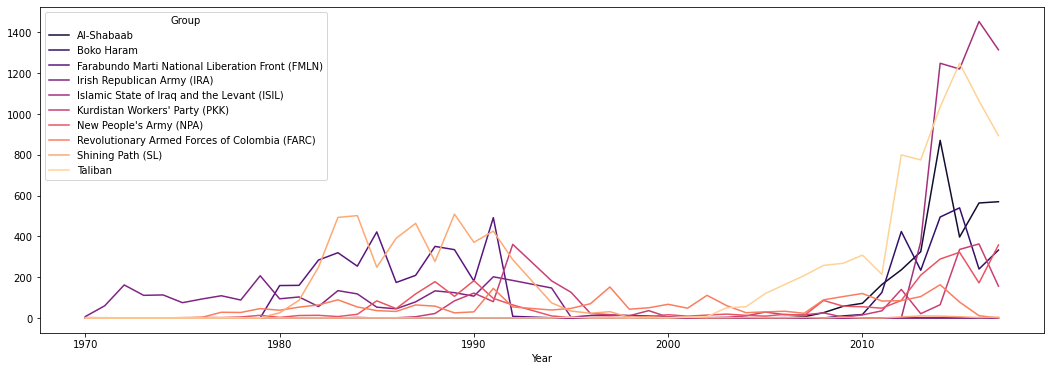

In [22]:
top_groups10=df[df['Group'].isin(df['Group'].value_counts()[1:11].index)]
pd.crosstab(top_groups10.Year,top_groups10.Group).plot(color=sns.color_palette('magma',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

# Killed V/S wounded

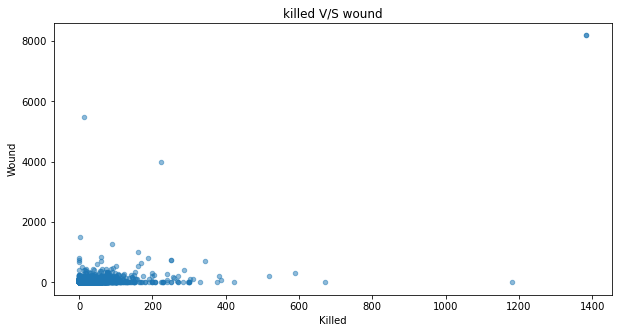

In [23]:
df.plot(kind = 'scatter', x='Killed', y='Wounded',alpha = 0.5, figsize = (10,5))
plt.title('killed V/S wound')
plt.xlabel('Killed')
plt.ylabel('Wound')
plt.show()

# Most attacked in a single year

In [24]:
df.Year.value_counts()

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
2009     4721
1991     4683
1989     4324
1990     3887
1988     3721
1984     3495
1994     3456
2007     3242
1997     3197
1987     3183
1995     3081
1996     3058
1985     2915
1983     2870
1986     2860
2006     2758
1979     2662
1980     2662
1981     2586
1982     2544
2005     2017
2001     1906
2000     1814
1978     1526
1999     1395
2002     1333
1977     1319
2003     1278
2004     1166
1998      934
1976      923
1975      740
1970      651
1974      581
1972      568
1973      473
1971      471
Name: Year, dtype: int64

# Least attacked countries

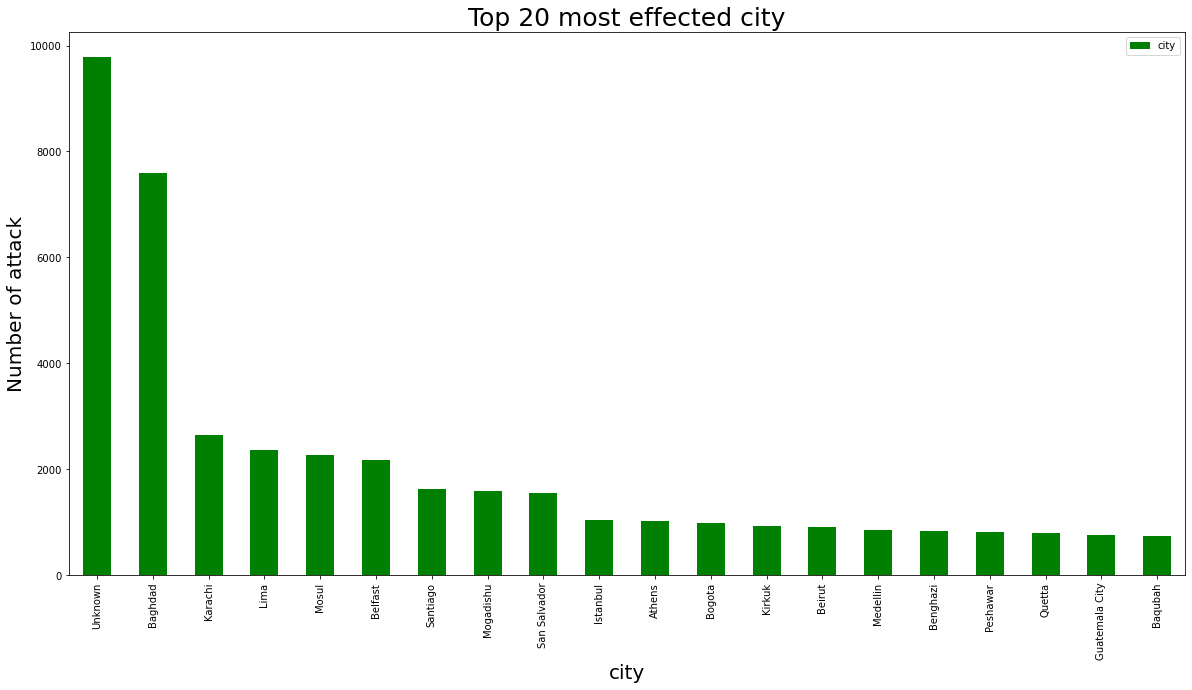

In [25]:
df['city'].value_counts().to_frame().sort_values('city',axis=0,ascending=False).head(20).plot(kind='bar',figsize=(20,10),color='green')
plt.xticks(rotation = 90)
plt.xlabel("city",fontsize=20)
plt.ylabel("Number of attack",fontsize=20)
plt.title("Top 20 most effected city",fontsize=25)
plt.show()

In [26]:
df['Weapon_type'].value_counts()[:10]

Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Name: Weapon_type, dtype: int64

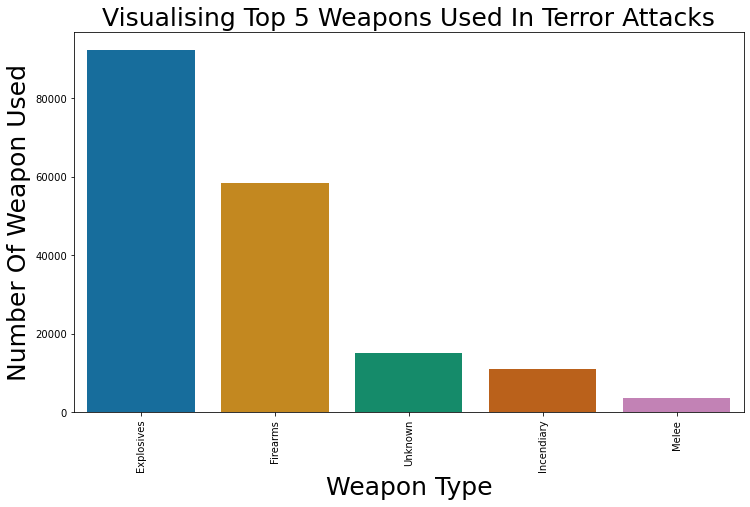

In [27]:
plt.subplots(figsize=(12,7))
sns.barplot(df['Weapon_type'].value_counts()[:5].index, df['Weapon_type'].value_counts()[:5].values, palette='colorblind')
plt.title("Visualising Top 5 Weapons Used In Terror Attacks", fontsize=25)
plt.xlabel('Weapon Type', fontsize=25)
plt.ylabel('Number Of Weapon Used', fontsize=25)
plt.xticks(rotation = 90)
plt.show()

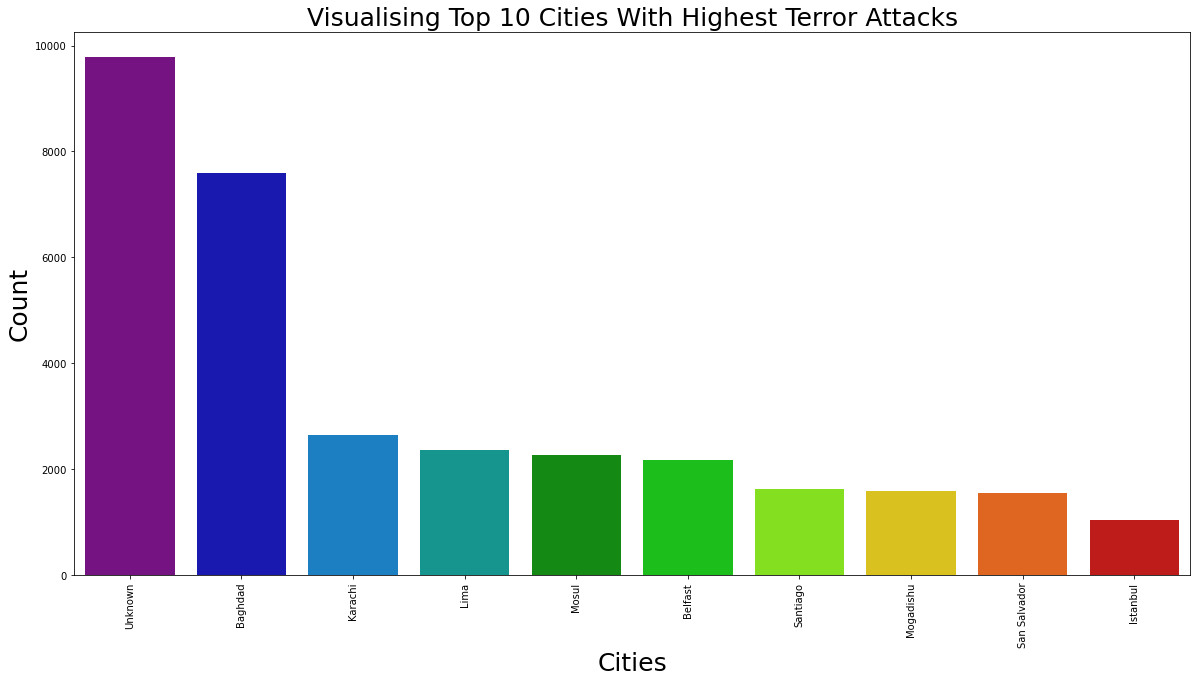

In [28]:
plt.subplots(figsize=(20,10))
sns.barplot(df['city'].value_counts()[:10].index,df['city'].value_counts()[:10].values,palette= 'nipy_spectral')
plt.title("Visualising Top 10 Cities With Highest Terror Attacks", fontsize=25)
plt.xlabel('Cities', fontsize=25)
plt.ylabel('Count', fontsize=25)
plt.xticks(rotation = 90)
plt.show()

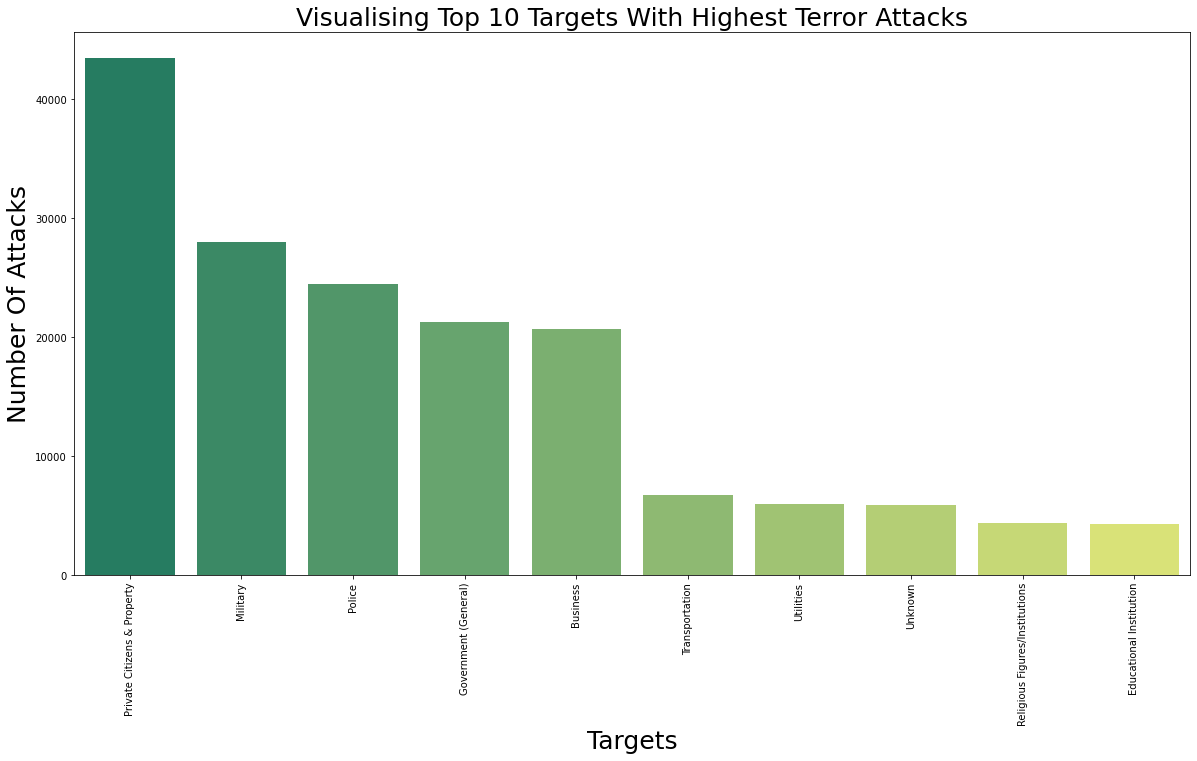

In [29]:
plt.subplots(figsize=(20,10))
sns.barplot(df['Target_type'].value_counts()[:10].index, df['Target_type'].value_counts()[:10].values, palette='summer')
plt.title("Visualising Top 10 Targets With Highest Terror Attacks", fontsize=25)
plt.xlabel('Targets', fontsize=25)
plt.ylabel('Number Of Attacks', fontsize=25)
plt.xticks(rotation = 90)
plt.show()

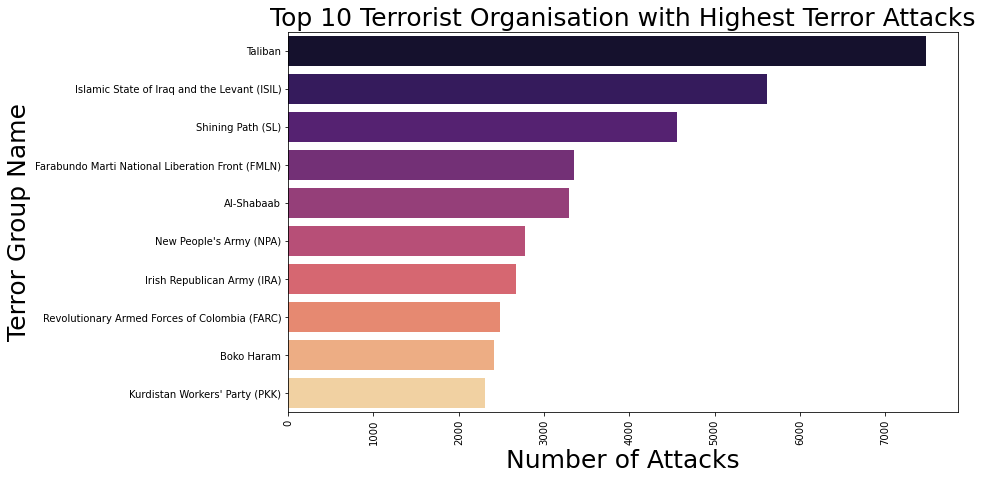

In [30]:
plt.figure(figsize = (12,7))
sns.barplot(x = df['Group'].value_counts()[1:11].values, y = df['Group'].value_counts()[1:11].index,palette='magma')
plt.title('Top 10 Terrorist Organisation with Highest Terror Attacks', fontsize=25)
plt.ylabel('Terror Group Name', fontsize=25)
plt.xlabel('Number of Attacks', fontsize=25)
plt.xticks(rotation= 90)
plt.show()